In [1]:
# 用python的json模块读入json数据
import json
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
data_path="/home/feel-liao/OneDrive/Ubuntu/Datasci/pydata-book-2nd-edition/datasets/bitly_usagov/example.txt"
records=[json.loads(line) for line in open(data_path)]

In [2]:
#用pandas对records的数据进行整理
data_original=pd.DataFrame(records)
#填充缺失值
data_tz=data_original["tz"].fillna("Missing")
data_tz[data_tz==""]="Unknown"
tz_counts=data_tz.value_counts()

<AxesSubplot:>

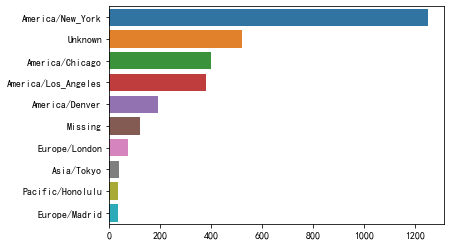

In [3]:
#绘制tz的前10条数据的条行图
sns.barplot(y=tz_counts[:10].index,x=tz_counts[:10].values,orient="h")

([<matplotlib.patches.Wedge at 0x7f6fdc4fc3a0>],
 [Text(-0.66, 8.082668874372532e-17, '')])

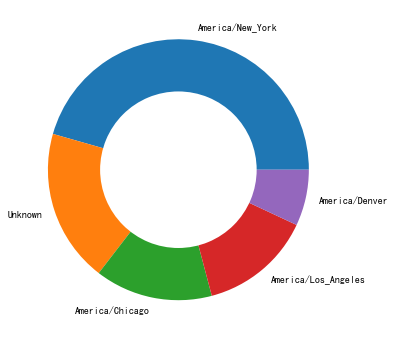

In [4]:
#tz的前5条数据绘制圆环图
data_pie=tz_counts[:5]
plt.figure(figsize=[6,6])
plt.pie(x=data_pie,labels=data_pie.index)
plt.pie(x=[1],colors=["#ffffff"],radius=0.6)

In [5]:
#对c进行分析
data_c=data_original["c"].fillna("Missing")
data_c[data_c==""]="Unknown"
c_counts=data_c.value_counts()
c_counts[:10]

US         2305
Missing     641
GB           74
CA           60
ES           37
JP           37
BR           35
DE           28
IT           27
NL           22
Name: c, dtype: int64

<AxesSubplot:>

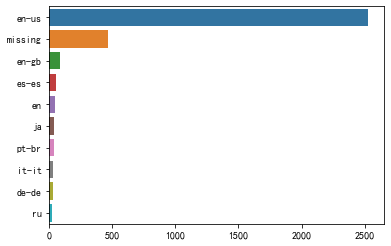

In [6]:
#对al进行分析
data_al=data_original["al"].fillna("Missing")
data_al[data_al==""]="Unknown"
#处理al中的列名称
al_p=pd.Series([x.split(",")[0] for x in data_al])
#处理al中重复的字符串
al_p=pd.Series([x.upper() for x in al_p])
al_p=pd.Series([x.lower() for x in al_p])
#对al进行统计
al_counts=al_p.value_counts()
#对al数据进行展示
sns.barplot(y=al_counts.index[:10],x=al_counts.values[:10],orient="h")

([<matplotlib.patches.Wedge at 0x7f6fdc3f91f0>],
 [Text(-0.66, 8.082668874372532e-17, '')])

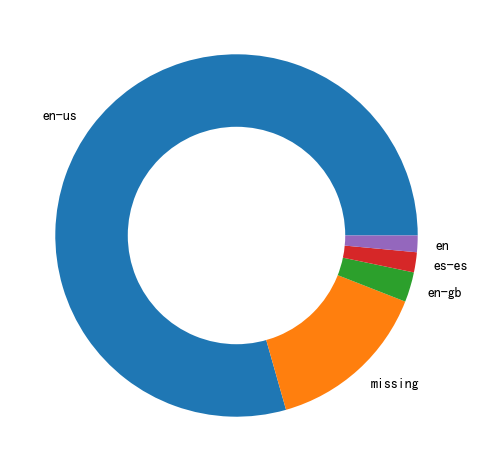

In [7]:
plt.figure(figsize=[6,6],dpi=100)
plt.pie(x=al_counts.values[:5],labels=al_counts.index[:5],radius=1)
plt.pie(x=[1],radius=0.6,colors=["#ffffff"])

<AxesSubplot:>

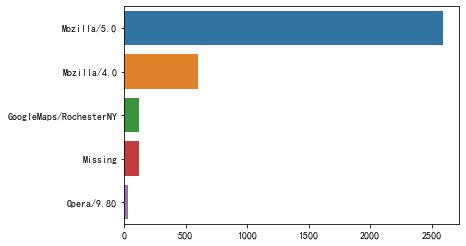

In [8]:
#对a进行分析
data_a=data_original["a"].fillna("Missing")
data_a[data_a==""]="Unknown"
a_p=pd.Series([x.split()[0] for x in data_a])
a_p_counts=a_p.value_counts()
sns.barplot(x=a_p_counts.values[:5],y=a_p_counts.index[:5],orient="h")

In [9]:
#分析用户上网操作系统 
#假设a字段中含有windows就认定为windows用户
a_os_original=data_original[data_original["a"].notnull()]
a_os=a_os_original.copy()
a_os["os"]=np.where(a_os.a.str.contains("Windows"),"Windows","Not Windows")
#按照时区和操作系统分类
by_os_tz=a_os.groupby(["tz","os"])

In [10]:
os_tz=by_os_tz.size().unstack().fillna(0).reset_index()

In [11]:
os_tz['tz'][0]="Unknown"
os_tz=os_tz.set_index(keys=["tz"])

<ipython-input-11-bb271409d3ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  os_tz['tz'][0]="Unknown"


In [12]:
#建立间接索引数组
indexr=os_tz.sum(1).argsort()
count_subset=os_tz.take(indexr[-10:])

In [13]:
# 画图
count_subset=count_subset.stack()
print(type(count_subset))
count_subset.name="Total"
print(type(count_subset))
count_subset=count_subset.reset_index()
print(type(count_subset))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:xlabel='Total', ylabel='tz'>

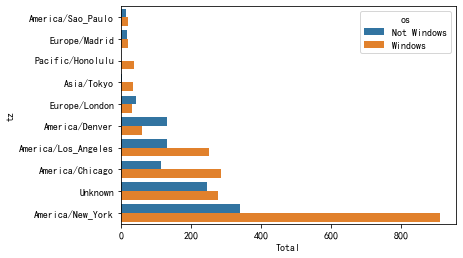

In [14]:
sns.barplot(x='Total', y='tz', hue='os',  data=count_subset)

In [15]:
count_subset

,tz,os,Total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0
